<a href="https://colab.research.google.com/github/MohamedTolba1199/DeepLearning/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.drop('Geography',axis=1,inplace=True)
df.drop('Gender',axis=1,inplace=True)
X = df.iloc[:, 3:11].values
y = df.iloc[:, 11].values


Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model=keras.models.Sequential([

    keras.layers.Dense(6,activation='relu',input_dim=8),   #I Have 8Features input
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6,activation='relu'), #Hidden Layers
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation='sigmoid') #output(Binary Classification)

]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 batch_normalization (Batch  (None, 6)                 24        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 batch_normalization_1 (Bat  (None, 6)                 24        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 127 (5

In [9]:
model.compile(optimizer = 'SGD',loss='binary_crossentropy' , metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
225/225 [==============================] - 5s 6ms/step - loss: 0.5964 - accuracy: 0.7085 - val_loss: 0.5273 - val_accuracy: 0.7912
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7942 - val_loss: 0.4926 - val_accuracy: 0.7875
Epoch 3/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4857 - accuracy: 0.7943 - val_loss: 0.4772 - val_accuracy: 0.7887
Epoch 4/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4762 - accuracy: 0.7928 - val_loss: 0.4674 - val_accuracy: 0.7788
Epoch 5/50
225/225 [==============================] - 1s 6ms/step - loss: 0.4696 - accuracy: 0.7957 - val_loss: 0.4592 - val_accuracy: 0.7800
Epoch 6/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4639 - accuracy: 0.8003 - val_loss: 0.4524 - val_accuracy: 0.7837
Epoch 7/50
225/225 [==============================] - 1s 5ms/step - loss: 0.4603 - accuracy: 0.7989 - val_loss: 0.4479 - val_accuracy: 0.7900
Epoch 

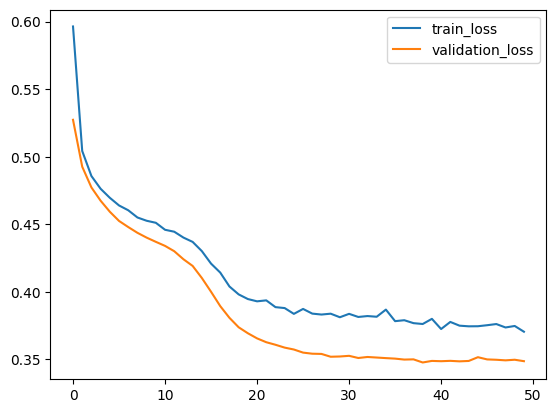

In [11]:
plt.plot(history.history['loss']  , label='train_loss')
plt.plot(history.history['val_loss']  , label='validation_loss')
plt.legend()
plt.show()

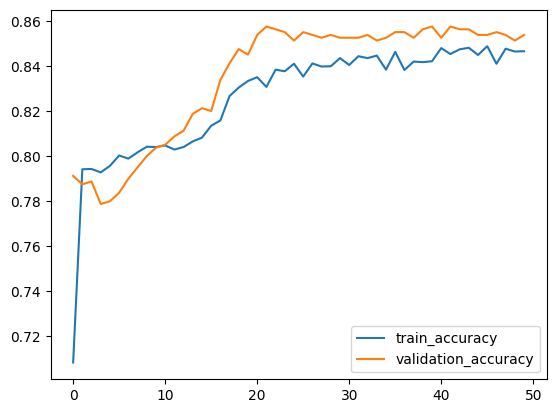

In [12]:
plt.plot(history.history['accuracy']  , label='train_accuracy')
plt.plot(history.history['val_accuracy']  , label='validation_accuracy')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.14679374],
       [0.37684563],
       [0.24661572],
       ...,
       [0.09279878],
       [0.07514483],
       [0.13829708]], dtype=float32)

In [14]:
y_pred=[1 if i >=0.5 else 0 for i in y_pred]
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.864